# Application of Email Spam Filtering Algorithms to SMS Data


## Yishu Xue

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
% matplotlib inline

sms = pd.read_csv("../spam.csv", encoding = 'latin-1');
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
sms = sms.rename(columns = {"v1": "Label", "v2": "Text"})
sms["Length"] = sms["Text"].apply(len)

### The Data:

The dataset is vailable from [Kaggle](https://www.kaggle.com/uciml/sms-spam-collection-dataset). There are 5,572 messages in total, 747 of which are spam. All messages are in English. 

Examples:

In [2]:
print(sms[0:5])

  Label                                               Text  Length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


In [3]:
import re
len(re.findall(r'[A-Z]', sms["Text"][1]))
def ncap(mystring):
    return (len(re.findall(r'[A-Z]', mystring)))

def nnum(mystring):
    return (len(re.findall(r'[0-9]', mystring)))

sms["ncap"] = sms["Text"].apply(ncap)
sms["nnum"] = sms["Text"].apply(nnum)
sms["pcap"] = sms["ncap"].div(sms["Length"], axis = 0)
sms["pnum"] = sms["nnum"].div(sms["Length"], axis = 0)

Label
ham     AxesSubplot(0.125,0.125;0.775x0.755)
spam    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pcap, dtype: object

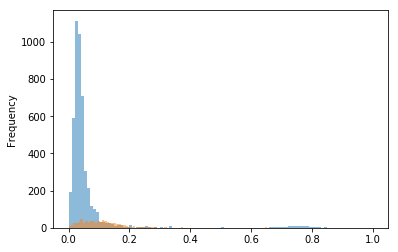

In [4]:
sms.groupby("Label").pcap.plot(kind = "hist", alpha = 0.5, bins = 100)

The proportion of capital letters might not be quite helpful in distinguishing ham and spam. Converting everything to lower case incurs little information loss.

Label
ham     AxesSubplot(0.125,0.125;0.775x0.755)
spam    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pnum, dtype: object

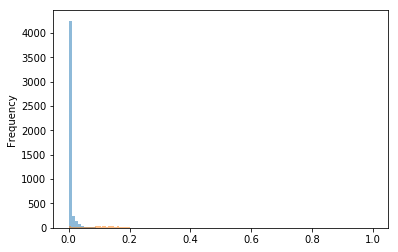

In [5]:
sms.groupby("Label").pnum.plot(kind = "hist", alpha = 0.5, bins = 100)

The proportion of numbers in spam is higher than that in hams. It might be helpful!

In [6]:
to_process = sms["Text"].copy()
to_process = to_process.str.lower()
stop_words = set(stopwords.words("english"))

def clean_message(text):
    # te
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = [word for word in text.split() if word not in stopwords.words("english")]
    
    return " ".join(text)

text_cleaned = to_process.apply(clean_message)

In [7]:
from collections import Counter
freqSpam = Counter(" ".join(text_cleaned[sms["Label"] == "spam"]).split()).most_common(20)
freqHam = Counter(" ".join(text_cleaned[sms["Label"] == "ham"]).split()).most_common(20)

### Text cleaning:

* Convert everything to lowercase. 
* Remove "stopwords".

#### What are typical examples of stopwords?

In [8]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

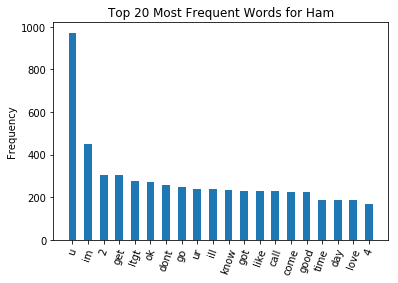

In [9]:
import matplotlib.pyplot as plt
labels, ys = zip(*freqHam)
xs = np.arange(len(labels)) 
width = 0.5
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels)
plt.xticks(rotation=70)
plt.title("Top 20 Most Frequent Words for Ham")
plt.ylabel("Frequency")
plt.show()

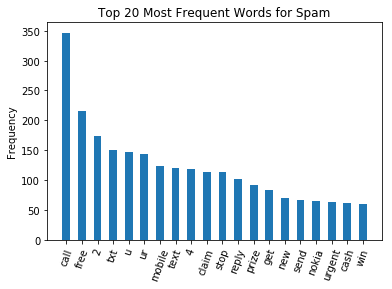

In [10]:
labels, ys = zip(*freqSpam)
xs = np.arange(len(labels)) 
width = 0.5
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels)
plt.xticks(rotation=70)
plt.title("Top 20 Most Frequent Words for Spam")
plt.ylabel("Frequency")
plt.show()

### Convert text information to sparse matrices: different methods

#### `CountVectorizer`

`CountVectorizer` implements both tokenization and occurence counting in a single class. 

* Tokenization: a way to split **text** into tokens. These tokens could be paragraphs, sentences, or individual words. 

* Occurence counting: count the occurences of tokens in each document.

An example:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
exampleCorpus = [
    'This is the first sentence.',
    'This is the second second sentence',
    'And the third one',
    'Is this the first document?'
]

X = vectorizer.fit_transform(exampleCorpus)
X.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 2, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occuring in the corpus.

#### `TfidfVectorizer`

*Intuition: re-weight the count features, so that highly frequent words do not sharow the frequencies of rarer yet more interesting terms.*

* Tf: term-frequency
* tf-idf: term-frequency times *inverse document-frequency*, i.e. $\text{tf-idf}(t,d) = \text{tf}(t,d) \times \text{idf}(t)$, where $\text{tf}(t,d)$ is the occurence of term $t$ in the documents, and 

$$\text{idf}(t) = \log \frac{1 + n_d}{1 + \text{df}(d,t)} + 1,$$

where $n_d$ is the total number of documents, and $\text{df}(d,t)$ is the number of documents that contain term $t$. 

The resulting tf-idf vectors could either be directly fed to classifiers, or normalized using $\ell_1$ or $\ell_2$ norm.

In [12]:
## tfidvectorizer using $\ell_1$ normalizaiton
vectorizer2 = TfidfVectorizer(norm = "l1")
X2 = vectorizer2.fit_transform(exampleCorpus)
X2.toarray()

array([[0.        , 0.        , 0.23358689, 0.18910872, 0.        ,
        0.        , 0.23358689, 0.15460877, 0.        , 0.18910872],
       [0.        , 0.        , 0.        , 0.13915655, 0.        ,
        0.43603126, 0.17188603, 0.1137696 , 0.        , 0.13915655],
       [0.28394236, 0.        , 0.        , 0.        , 0.28394236,
        0.        , 0.        , 0.14817291, 0.28394236, 0.        ],
       [0.        , 0.27879794, 0.2198075 , 0.17795311, 0.        ,
        0.        , 0.        , 0.14548833, 0.        , 0.17795311]])

In [13]:
## tfidvectorizer using $\ell_2$ normalizaiton
vectorizer3 = TfidfVectorizer(norm = "l2")
X3 = vectorizer3.fit_transform(exampleCorpus)
X3.toarray()

array([[0.        , 0.        , 0.51646957, 0.41812662, 0.        ,
        0.        , 0.51646957, 0.34184591, 0.        , 0.41812662],
       [0.        , 0.        , 0.        , 0.26714448, 0.        ,
        0.8370669 , 0.32997658, 0.21840812, 0.        , 0.26714448],
       [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
        0.        , 0.        , 0.28847675, 0.55280532, 0.        ],
       [0.        , 0.60759891, 0.47903796, 0.38782252, 0.        ,
        0.        , 0.        , 0.31707032, 0.        , 0.38782252]])

In [14]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import matplotlib

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

### Start with `CountVectorizer`

Split the matrix `features` into training (80%) and testing (20%) sets.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [16]:
vectorizer = CountVectorizer("english")
features = vectorizer.fit_transform(text_cleaned)
featureTrain, featureTest, labelTrain, labelTest = train_test_split(features, sms["Label"],
                                                      test_size = 0.2, random_state = 1234)

In [17]:
svc = SVC(kernel = "sigmoid", gamma = 0.15)
eln = SGDClassifier(loss = "log", penalty = "elasticnet", l1_ratio = 0.45, alpha = 0.0001,
                   tol= None, max_iter = 100)
dtc = DecisionTreeClassifier(min_samples_split = 9, random_state = 2345)
mnb = MultinomialNB(alpha = 0.6)
knc = KNeighborsClassifier(n_neighbors = 20)
rfc = RandomForestClassifier(n_estimators = 53, random_state = 2345)
abc = AdaBoostClassifier(n_estimators = 37, random_state = 2345)
bgc = BaggingClassifier(n_estimators = 43, random_state = 2345)
etc = ExtraTreesClassifier(n_estimators = 23, random_state = 2345)

In [18]:
classifier = {"Support Vector Machine": svc, "Logistic Regression": eln, 
             "Decision Tree": dtc, "Multinomial Naive Bayes": mnb, 
             "K-Nearest Neighbor": knc, "Random Forest": rfc, 
             "Adaboost": abc, "Bagging": bgc, "ExtraTrees": etc}

In [19]:
def train_classifier(cl, feature_train, labels_train):
    cl.fit(feature_train, labels_train)
    
def test_classifier(cl, feature_test):
    return(cl.predict(feature_test))

In [20]:
predScore = []
for k,v in classifier.items():
    train_classifier(v, featureTrain, labelTrain)
    pred = test_classifier(v, featureTest)
    predScore.append((k, [accuracy_score(labelTest, pred)]))

The performance of different classifiers on the testing dataset, using features created by `CountVectorizer`:

In [21]:
predScore

[('Support Vector Machine', [0.9748878923766816]),
 ('Logistic Regression', [0.9838565022421525]),
 ('Decision Tree', [0.9695067264573991]),
 ('Multinomial Naive Bayes', [0.9766816143497757]),
 ('K-Nearest Neighbor', [0.8511210762331839]),
 ('Random Forest', [0.9739910313901345]),
 ('Adaboost', [0.9614349775784753]),
 ('Bagging', [0.9713004484304932]),
 ('ExtraTrees', [0.9802690582959641])]

([<matplotlib.axis.XTick at 0x10c4f0dd8>,
 <a list of 9 Text xticklabel objects>)

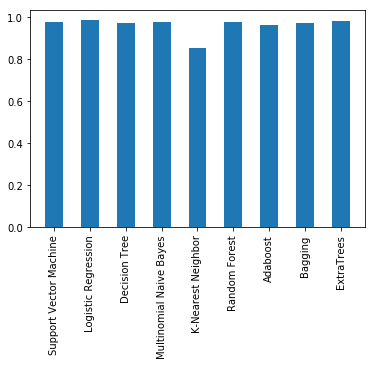

In [22]:
import matplotlib.pyplot as plt
labels, ys = zip(*predScore)
yss = []
for item in ys:
    yss.extend(item)
xs = np.arange(len(labels))
width = 0.5
plt.bar(xs, yss, width, align = "center")
plt.xticks(xs, labels, rotation = "vertical")

#### What about `TfidfVectorizer`? 

In [23]:
vectorizer2 = TfidfVectorizer("english", norm = "l2")
features_tf = vectorizer2.fit_transform(text_cleaned)
featureTrain_tf, featureTest_tf, labelTrain_tf, labelTest_tf = train_test_split(features_tf, sms["Label"],
                                                      test_size = 0.2, random_state = 1234)

In [24]:
svc = SVC(kernel = "sigmoid", gamma = 1)
eln = SGDClassifier(loss = "log", penalty = "elasticnet", l1_ratio = 0, alpha = 0.0001,
                   tol= None, max_iter = 100)
dtc = DecisionTreeClassifier(min_samples_split = 7, random_state = 2345)
mnb = MultinomialNB(alpha = 0.05)
knc = KNeighborsClassifier(n_neighbors = 41)
rfc = RandomForestClassifier(n_estimators = 31, random_state = 2345)
abc = AdaBoostClassifier(n_estimators = 37, random_state = 2345)
bgc = BaggingClassifier(n_estimators = 33, random_state = 2345)
etc = ExtraTreesClassifier(n_estimators = 33, random_state = 2345)

predScore_tf = []
for k,v in classifier.items():
    train_classifier(v, featureTrain_tf, labelTrain_tf)
    pred = test_classifier(v, featureTest_tf)
    predScore_tf.append((k, [accuracy_score(labelTest_tf, pred)]))

In [25]:
predScore_tf

[('Support Vector Machine', [0.9300448430493273]),
 ('Logistic Regression', [0.9632286995515695]),
 ('Decision Tree', [0.9659192825112107]),
 ('Multinomial Naive Bayes', [0.9721973094170404]),
 ('K-Nearest Neighbor', [0.8923766816143498]),
 ('Random Forest', [0.9766816143497757]),
 ('Adaboost', [0.9659192825112107]),
 ('Bagging', [0.9775784753363229]),
 ('ExtraTrees', [0.9739910313901345])]

In [26]:
predScore

[('Support Vector Machine', [0.9748878923766816]),
 ('Logistic Regression', [0.9838565022421525]),
 ('Decision Tree', [0.9695067264573991]),
 ('Multinomial Naive Bayes', [0.9766816143497757]),
 ('K-Nearest Neighbor', [0.8511210762331839]),
 ('Random Forest', [0.9739910313901345]),
 ('Adaboost', [0.9614349775784753]),
 ('Bagging', [0.9713004484304932]),
 ('ExtraTrees', [0.9802690582959641])]

Simpler, easier-to-interprete algorithms tend to have better performance with the count feature matrix, while ensemble methods perform better on the tf-idf transformed feature matrix. The performance of `KNN` is much worse than others using both matrices.

**Choice**: use count feature matrix with `Support Vector Machine`, `Logistic Regression`, `Decision Tree` and `Multinomial Naive Bayes` for further study.

### What about adding the proportion of numbers? 

In [27]:
svc = SVC(kernel = "rbf", gamma = 0.05)
eln = SGDClassifier(loss = "log", penalty = "elasticnet", l1_ratio = 0.52, alpha = 0.0001)
dtc = DecisionTreeClassifier(min_samples_split = 7, random_state = 2345)
mnb = MultinomialNB(alpha = 0.05)

classifier = {"Support Vector Machine": svc, "Logistic Regression": eln, 
             "Decision Tree": dtc, "Multinomial Naive Bayes": mnb}

In [28]:
from scipy.sparse import hstack
features_ext = hstack([features, sms["pnum"][:,None]])
featureTrain_ext, featureTest_ext, labelTrain, labelTest = train_test_split(features_ext,
                                        sms["Label"],test_size = 0.2, random_state = 1234)
predScore_ext = []
for k,v in classifier.items():
    train_classifier(v, featureTrain_ext, labelTrain)
    pred = test_classifier(v, featureTest_ext)
    predScore_ext.append((k, [accuracy_score(labelTest, pred)]))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [29]:
predScore_ext

[('Support Vector Machine', [0.9811659192825112]),
 ('Logistic Regression', [0.9838565022421525]),
 ('Decision Tree', [0.9811659192825112]),
 ('Multinomial Naive Bayes', [0.9775784753363229])]

The addition of `pnum` increases the prediction accuracy for all four classifiers!

### Imbalanced Data

In this case, it would be more reasonable to downsample the `ham` class. 

In [30]:
hamInd = np.asarray(sms.index[sms["Label"] == "ham"].tolist())
spamInd = np.asarray(sms.index[sms["Label"] == "spam"].tolist())

In [31]:
np.random.seed(1812)
trainHam = np.random.choice(hamInd, 965, replace = False)
np.random.seed(7370)
trainSpam = np.random.choice(spamInd, 597, replace = False)

In [32]:
trainInd = np.append(trainHam, trainSpam)
testInd = np.setdiff1d(np.arange(5572), trainInd)

In [33]:
text_cleaned = to_process.apply(clean_message)
features = vectorizer.fit_transform(text_cleaned)
# featureTrain, featureTest, labelTrain, labelTest = train_test_split(features, rsms["Label"],
#                                                     test_size = 0.2, random_state = 1234)

In [34]:
featureTrain = features.tocsr()[trainInd,:]
featureTest = features.tocsr()[testInd,:]
labelTrain = sms["Label"][trainInd]
labelTest = sms["Label"][testInd]

In [35]:
svc = SVC(kernel = "rbf", gamma = 0.05)
eln = SGDClassifier(loss = "log", penalty = "elasticnet", l1_ratio = 0.52, alpha = 0.0001, tol = 0.0001, max_iter = 1000)
dtc = DecisionTreeClassifier(min_samples_split = 7, random_state = 2345)
mnb = MultinomialNB(alpha = 0.05)

predScore = []
for k,v in classifier.items():
    train_classifier(v, featureTrain, labelTrain)
    pred = test_classifier(v, featureTest)
    predScore.append((k, [accuracy_score(labelTest, pred)]))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [36]:
predScore

[('Support Vector Machine', [0.9743142144638404]),
 ('Logistic Regression', [0.9733167082294264]),
 ('Decision Tree', [0.9094763092269327]),
 ('Multinomial Naive Bayes', [0.9685785536159601])]

Logistic regression with elasticnet penalty provides best performance.

In [37]:
eln.fit(featureTrain, labelTrain)
pred = eln.predict(featureTest)

In [38]:
cheater = np.where(pred != np.asarray(labelTest))
cheaterInd = labelTest.index[cheater]
sms.loc[cheaterInd,"Text"]

70         Wah lucky man... Then can save money... Hee...
75            I am waiting machan. Call me once you free.
84                                         Yup next stop.
105     Thanks a lot for your wishes on my birthday. T...
161     New car and house for my parents.:)i have only...
180     You lifted my hopes with the offer of money. I...
193     It will stop on itself. I however suggest she ...
386                       Customer place i will call you.
420      Yes:)from last week itself i'm taking live call.
458     1.20 that call cost. Which i guess isnt bad. M...
494                      Are you free now?can i call now?
554     IÛ÷ll have a look at the frying pan in case i...
559     Aiyo... U always c our ex one... I dunno abt m...
602                Speaking of does he have any cash yet?
606     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
699              K..u also dont msg or reply to his msg..
730     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
750     Do you

In [39]:
sms.loc[cheaterInd, "Label"].describe()

count      97
unique      2
top       ham
freq       84
Name: Label, dtype: object

## Text clustering?

Two algorithms: `k-means` and (its more scalable cousin) `minibatch k-means`

In [40]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
## ell_2 transformation
X = vectorizer3.fit_transform(text_cleaned)

In [41]:
X

<5572x9376 sparse matrix of type '<class 'numpy.float64'>'
	with 47254 stored elements in Compressed Sparse Row format>

In [42]:
km1 = MiniBatchKMeans(n_clusters = 2, init = 'k-means++', n_init = 10)
km1.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=10, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [43]:
sum(km1.labels_)

497

In [44]:
metrics.homogeneity_score(sms["Label"] == "Spam", km1.labels_) 

1.0

In [45]:
metrics.completeness_score(sms["Label"] == "Spam", km1.labels_)

-5.123277052431375e-15

In [46]:
km2 = KMeans(n_clusters = 2, init = "k-means++", n_init = 10)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
sum(km2.labels_)

198

In [48]:
metrics.homogeneity_score(sms["Label"] == "Spam", km2.labels_) 

1.0

In [49]:
metrics.completeness_score(sms["Label"] == "Spam", km2.labels_)

1.1347507443106382e-14

## Thank you!